In [1]:
# Imports

import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Loading the dataset

dataset = np.load('/Users/anilthapa/Downloads/nyc_taxi_data.npy', allow_pickle=True).item()
X_train, y_train, X_test, y_test = dataset["X_train"], dataset["y_train"], dataset["X_test"], dataset["y_test"]

## 1. Checking the shape of our datasets.

In [3]:
X_train.shape

(1312779, 10)

In [4]:
y_train.shape

(1312779,)

In [5]:
X_test.shape

(145865, 10)

In [6]:
y_test.shape

(145865,)

## 2. Checking the null values in our datasets

In [7]:
X_train.isna().any()

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
dtype: bool

In [8]:
X_test.isna().any()

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
dtype: bool

In [9]:
X_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
879655,id2425795,1,2016-01-08 23:55:11,2016-01-09 00:04:32,1,-73.955551,40.773346,-73.973640,40.763500,N
646838,id0767831,2,2016-03-05 09:52:06,2016-03-05 10:00:12,1,-73.962181,40.763599,-73.980377,40.764919,N
1138713,id0449104,1,2016-04-09 16:03:53,2016-04-09 16:21:22,1,-73.977486,40.751842,-74.011688,40.718925,N
864716,id3030157,1,2016-01-06 11:12:44,2016-01-06 11:19:49,1,-73.970001,40.762363,-73.963264,40.774666,N
434927,id1584885,1,2016-06-26 09:10:56,2016-06-26 09:17:44,1,-73.950348,40.771561,-73.968178,40.762409,N
...,...,...,...,...,...,...,...,...,...,...
259178,id1753868,2,2016-03-25 07:11:49,2016-03-25 07:33:10,2,-73.955032,40.777328,-74.006203,40.749424,N
1414414,id2204747,1,2016-02-16 18:01:45,2016-02-16 18:15:38,1,-73.973618,40.763920,-73.983849,40.749874,N
131932,id3043606,2,2016-01-26 19:22:29,2016-01-26 19:43:54,1,-74.006195,40.734283,-73.949608,40.785282,N
671155,id1458584,1,2016-01-19 11:53:47,2016-01-19 12:00:16,1,-73.962341,40.767323,-73.969757,40.768669,N


In [10]:
X_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06
mean,1.534878e+00,1.664126e+00,-7.397350e+01,4.075093e+01,-7.397342e+01,4.075181e+01
std,4.987823e-01,1.313950e+00,7.351224e-02,3.291198e-02,7.316118e-02,3.579324e-02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01
75%,2.000000e+00,2.000000e+00,-7.396734e+01,4.076835e+01,-7.396302e+01,4.076980e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01


## 3. Label encode the `store_and_fwd_flag`

In [11]:
label_encoder = LabelEncoder()

In [12]:
X_train['store_and_fwd_flag'] = label_encoder.fit_transform(X_train['store_and_fwd_flag'])

In [13]:
X_test['store_and_fwd_flag'] = label_encoder.transform(X_test['store_and_fwd_flag'])

## 4. convert the `pickup_dateime` & `dropoff_datetime` into datetime object

In [14]:
X_train['pickup_datetime'] = pd.to_datetime(X_train['pickup_datetime'])
X_train['dropoff_datetime'] = pd.to_datetime(X_train['dropoff_datetime'])

In [15]:
X_test['pickup_datetime'] = pd.to_datetime(X_test['pickup_datetime'])
X_test['dropoff_datetime'] = pd.to_datetime(X_test['dropoff_datetime'])

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312779 entries, 879655 to 121958
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1312779 non-null  object        
 1   vendor_id           1312779 non-null  int64         
 2   pickup_datetime     1312779 non-null  datetime64[ns]
 3   dropoff_datetime    1312779 non-null  datetime64[ns]
 4   passenger_count     1312779 non-null  int64         
 5   pickup_longitude    1312779 non-null  float64       
 6   pickup_latitude     1312779 non-null  float64       
 7   dropoff_longitude   1312779 non-null  float64       
 8   dropoff_latitude    1312779 non-null  float64       
 9   store_and_fwd_flag  1312779 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 110.2+ MB


## 5. Drop the `id` & `vendor_id`, because it feels like they are just a placeholder at this point.

In [17]:
X_train.drop(['id', 'vendor_id'], axis = 1, inplace = True)

In [18]:
X_test.drop(['id', 'vendor_id'], axis = 1, inplace = True)

In [19]:
X_train

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
879655,2016-01-08 23:55:11,2016-01-09 00:04:32,1,-73.955551,40.773346,-73.973640,40.763500,0
646838,2016-03-05 09:52:06,2016-03-05 10:00:12,1,-73.962181,40.763599,-73.980377,40.764919,0
1138713,2016-04-09 16:03:53,2016-04-09 16:21:22,1,-73.977486,40.751842,-74.011688,40.718925,0
864716,2016-01-06 11:12:44,2016-01-06 11:19:49,1,-73.970001,40.762363,-73.963264,40.774666,0
434927,2016-06-26 09:10:56,2016-06-26 09:17:44,1,-73.950348,40.771561,-73.968178,40.762409,0
...,...,...,...,...,...,...,...,...
259178,2016-03-25 07:11:49,2016-03-25 07:33:10,2,-73.955032,40.777328,-74.006203,40.749424,0
1414414,2016-02-16 18:01:45,2016-02-16 18:15:38,1,-73.973618,40.763920,-73.983849,40.749874,0
131932,2016-01-26 19:22:29,2016-01-26 19:43:54,1,-74.006195,40.734283,-73.949608,40.785282,0
671155,2016-01-19 11:53:47,2016-01-19 12:00:16,1,-73.962341,40.767323,-73.969757,40.768669,0


In [20]:
X_test.head(5)

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
67250,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,0
1397036,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,0
1021087,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,0
951424,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,0
707882,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.789497,40.646675,-73.987137,40.759232,0


## 6. Feature Engineering: Choose month, day & hour from datetime object

In [21]:
X_train['pickup_day'] = X_train['pickup_datetime'].dt.day
X_train['pickup_hour'] = X_train['pickup_datetime'].dt.hour

In [22]:
X_train.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1, inplace=True)

In [23]:
X_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_hour
879655,1,-73.955551,40.773346,-73.973640,40.763500,0,8,23
646838,1,-73.962181,40.763599,-73.980377,40.764919,0,5,9
1138713,1,-73.977486,40.751842,-74.011688,40.718925,0,9,16
864716,1,-73.970001,40.762363,-73.963264,40.774666,0,6,11
434927,1,-73.950348,40.771561,-73.968178,40.762409,0,26,9
...,...,...,...,...,...,...,...,...
259178,2,-73.955032,40.777328,-74.006203,40.749424,0,25,7
1414414,1,-73.973618,40.763920,-73.983849,40.749874,0,16,18
131932,1,-74.006195,40.734283,-73.949608,40.785282,0,26,19
671155,1,-73.962341,40.767323,-73.969757,40.768669,0,19,11


In [24]:
X_test['pickup_day'] = X_test['pickup_datetime'].dt.day
X_test['pickup_hour'] = X_test['pickup_datetime'].dt.hour

In [25]:
X_test.drop(['pickup_datetime', 'dropoff_datetime'], axis = 1, inplace= True)

In [26]:
X_test

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_hour
67250,1,-73.985611,40.735943,-73.980331,40.760468,0,8,7
1397036,1,-73.978394,40.764351,-73.991623,40.749859,0,3,12
1021087,5,-73.989059,40.744389,-73.973381,40.748692,0,5,2
951424,2,-73.990326,40.731136,-73.991264,40.748917,0,5,17
707882,4,-73.789497,40.646675,-73.987137,40.759232,0,12,17
...,...,...,...,...,...,...,...,...
526279,1,-73.976257,40.757584,-73.973244,40.764671,0,1,20
80354,3,-73.982079,40.763584,-73.985001,40.739193,0,14,15
328645,3,-73.782654,40.644440,-73.991669,40.749641,0,31,20
657429,1,-73.979637,40.751862,-73.974945,40.758297,0,21,17


In [27]:
def calculate_time(hour):
    if 5<= hour <= 12:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'noon'
    elif 17 <= hour <= 21:
        return 'evening'
    else:
        return 'night'

In [28]:
X_train['pickup_hour'] = X_train['pickup_hour'].apply(calculate_time)

In [29]:
X_test['pickup_hour'] = X_test['pickup_hour'].apply(calculate_time)

In [30]:
X_test

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_hour
67250,1,-73.985611,40.735943,-73.980331,40.760468,0,8,morning
1397036,1,-73.978394,40.764351,-73.991623,40.749859,0,3,morning
1021087,5,-73.989059,40.744389,-73.973381,40.748692,0,5,night
951424,2,-73.990326,40.731136,-73.991264,40.748917,0,5,noon
707882,4,-73.789497,40.646675,-73.987137,40.759232,0,12,noon
...,...,...,...,...,...,...,...,...
526279,1,-73.976257,40.757584,-73.973244,40.764671,0,1,evening
80354,3,-73.982079,40.763584,-73.985001,40.739193,0,14,noon
328645,3,-73.782654,40.644440,-73.991669,40.749641,0,31,evening
657429,1,-73.979637,40.751862,-73.974945,40.758297,0,21,noon


## 7. Standardize the geo-locations and passsenger_count as well

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), ['passenger_count', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag','pickup_day']),
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['pickup_hour'])
    ]
)

In [32]:
X_train_scaled = preprocessor.fit_transform(X_train)

In [33]:
X_test_scaled = preprocessor.transform(X_test)

In [34]:
scaler = StandardScaler()

In [35]:
y_train_scaled = scaler.fit_transform(y_train.ravel().reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.ravel().reshape(-1, 1))

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_train_scaled, random_state=42)

## 8. Train the model

In [37]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Layer import Layer
from Linear import Linear
from Sequential import Sequential
from ReLU import ReLU

In [38]:
def build_model(input_size, hidden_layers, output_size):
    model = Sequential()
    model.add(Linear(input_size, hidden_layers[0]))
    model.add(ReLU())

    for i in range(1, len(hidden_layers)):
        model.add(Linear(hidden_layers[i - 1], hidden_layers[i]))
        model.add(ReLU())

    model.add(Linear(hidden_layers[-1], output_size))
    model.add(ReLU())

    return model

In [46]:
def train_model(model, X_train, X_valid, y_train, y_valid, epochs = 100, patience = 3, batch_size = 4096):
    train_losses = []
    validation_losses = []
    best_validation_loss = np.inf
    patience_counter = 0
    n_samples = X_train.shape[0]
    n_batches = n_samples // batch_size
   
    for epoch in range(epochs):
        
        # Training the model
        epoch_train_loss = 0
        
        shuffle = np.random.permutation(n_samples)
        X_train_shuffled = X_train[shuffle]
        y_train_shuffled = y_train[shuffle]
        
        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            
            X_batch = X_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]
            
            # Forward pass
            train_output = model.forward(X_batch)
            batch_loss = mean_squared_error(y_batch, train_output)
            epoch_train_loss += batch_loss
            
            # Backward pass
            output_gradient = 2 * (train_output - y_batch) / batch_size
            model.backward(output_gradient, learning_rate=0.0001)
        
        epoch_train_loss /= n_batches
        train_losses.append(epoch_train_loss)
       
        # Validation
        validation_output = model.forward(X_valid)
        validation_loss = mean_squared_error(y_valid, validation_output)
        validation_losses.append(validation_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_train_loss:.4f}, Validation Loss: {validation_loss:.4f}")
    
        # Early stopping
        if validation_loss < best_validation_loss:
            best_validation_loss = validation_loss
            patience_counter = 0
        else:
            patience_counter +=1
        if patience_counter > patience:
            print(f'Early Stopping at epoch: {epoch+1}')
            break
    return train_losses, validation_losses

In [51]:
model = build_model(11, [128, 64, 32, 16, 8, 4], 1)

train_losses, validation_losses = train_model(model, X_train, X_valid, y_train, y_valid)

Epoch 1/100, Train Loss: 1.0894, Validation Loss: 0.7352
Epoch 2/100, Train Loss: 1.0892, Validation Loss: 0.7352
Epoch 3/100, Train Loss: 1.0897, Validation Loss: 0.7352
Epoch 4/100, Train Loss: 1.0889, Validation Loss: 0.7352
Epoch 5/100, Train Loss: 1.0899, Validation Loss: 0.7352
Early Stopping at epoch: 5


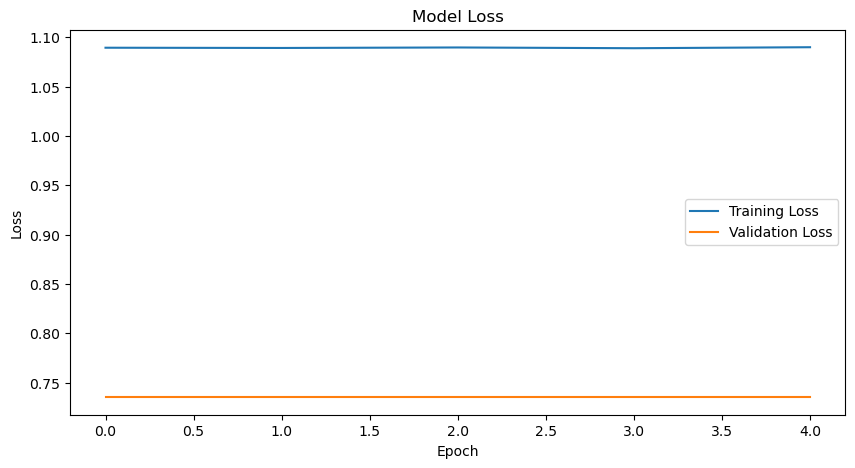

Test Loss: 0.3733


In [52]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title(f'Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on test set
test_output = model.forward(X_test_scaled)
test_loss = mean_squared_error(y_test_scaled, test_output)
print(f"Test Loss: {test_loss:.4f}")